___
# PROJETO 1

## <font color='red'>Pedro de la Peña</font>
___

## Como épocas de prosperidade econômica influenciam na qualidade de vida da população

## Introdução

Foram escolhidos dois anos distintos para serem analisados no Brasil: os anos de  <strong> 2011 e 2015</strong> para analizar e comparar suas condições de vida e de trabalho.

(introdução)


Historico econômico no Brasil

2011 - https://economia.uol.com.br/noticias/redacao/2012/03/06/economia-brasileira-cresce-27-em-2011-e-fica-abaixo-da-meta-do-governo.htm

2012 - https://economia.uol.com.br/noticias/redacao/2013/03/01/pib-2012.htm

2013 - http://g1.globo.com/economia/noticia/2014/02/economia-brasileira-avancou-23-em-2013-diz-ibge.html

2014 - https://economia.uol.com.br/noticias/redacao/2015/03/27/pib-2014.htm

2015 - http://www1.folha.uol.com.br/mercado/2015/12/1724604-a-tragedia-da-economia-brasileira-em-2015-em-7-graficos.shtml

___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\Projeto 1


# PNAD 2015

In [179]:
#Pnad 2015
p15 = pd.read_csv('DOM2015csv.zip', sep=',')

In [165]:
p15.shape

(115624, 81)

In [166]:
n = p15.shape[0]

# Qualitativas: V0201, V0220, V0226, V0231

In [268]:
#Especie do domicilio
p15['V0201'] = p15['V0201'].astype('category')
p15.V0201.cat.categories = ('Particular Permanente','Particular improvisado', 'Coletivo')

#Telefone Celular
p15['V0220'] = p15['V0220'].astype('category')
p15.V0220.cat.categories = ('Sim', 'Não')

#Tem televisão
p15['V0226'] = p15['V0226'].astype('category')
p15.V0226.cat.categories = ('Sim', 'Não')

#Tem computador
p15['V0231'] = p15['V0231'].astype('category')
p15.V0231.cat.categories = ('Sim', 'Não')

# Quantitativas: UF, V4620, V4621, V4105, V0205

In [172]:
#Separação por regiões
df1 = pd.DataFrame()
df1['Regiao']= p15.UF

df1.Regiao[(p15.UF>=10) & (p15.UF<20)]=1
df1.Regiao[(p15.UF>=20) & (p15.UF<30)]=2
df1.Regiao[(p15.UF>=30) & (p15.UF<40)]=3
df1.Regiao[(p15.UF>=40) & (p15.UF<50)]=4
df1.Regiao[(p15.UF>=50) & (p15.UF<60)]=5

df1['Regiao'] = df1['Regiao'].astype('category')
df1.Regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro_Oeste')

In [267]:
#Componentes por domicilio
df2 = pd.DataFrame()
df2['Pessoas_por_Domicilio'] = p15.V4620
df2.Pessoas_por_Domicilio.value_counts()

df2.Pessoas_por_Domicilio[(p15.V4620>0) & (p15.V4620<6)] = 1
df2.Pessoas_por_Domicilio[(p15.V4620>=6) & (p15.V4620<11)]  = 2
df2.Pessoas_por_Domicilio[(p15.V4620>=11) & (p15.V4620<16)] = 3
df2.Pessoas_por_Domicilio[(p15.V4620>16) & (p15.V4620<21)] = 4
df2.Pessoas_por_Domicilio[(p15.V4620>=21)] = 5

df2['Pessoas_por_Domicilio'] = df2['Pessoas_por_Domicilio'].astype('category')
df2.Pessoas_por_Domicilio.cat.categories = ('1~5', '6~10', '11~15', '16~20', '21~30')

In [202]:
#Renda domiciliar mensal em salarios minimos 2015
df3 = pd.DataFrame()
df3['SM'] = p15.V4621/788
df3 = df3[df3.SM <100]

In [266]:
#Situação censitária
df4 = pd.DataFrame()
df4['Situação_Sensitária'] = p15.V4105

df4.Situação_Sensitária[(p15.V4105>=1) & (p15.V4105<4)] = 1
df4.Situação_Sensitária[(p15.V4105>=4) & (p15.V4105<9)] = 2

df4['Situação_Sensitária'] = df4['Situação_Sensitária'].astype('category')
df4.Situação_Sensitária.cat.categories = ('Urbana', 'Rural')

In [241]:
df5 = pd.DataFrame()
df5['Comodos_por_domicílio'] = p15.V0205

# PNAD 2011

In [12]:
p11 = pd.read_csv('DOM2011csv.zip', sep=',')

In [13]:
p11.shape

(146207, 66)

In [14]:
m = p11.shape[0]

# Qualitativas: V0201, V0220, V0226, V0232

In [99]:
#Especie do domicilio
p11['V0201'] = p11['V0201'].astype('category')
p11.V0201.cat.categories = ('Particular Permanente','Particular improvisado', 'Coletivo')

#Telefone Celular
p11['V0220'] = p11['V0220'].astype('category')
p11.V0220.cat.categories = ('Sim', 'Não')

#Tem televisão
p11['V0226'] = p11['V0226'].astype('category')
p11.V0226.cat.categories = ('Sim', 'Não')

#Tem computador
p11['V0231'] = p11['V0231'].astype('category')
p11.V0231.cat.categories = ('Sim', 'Não')

# Quantitativas: V4620, V4621, V4105, V0205

In [16]:
#Componentes por domicilio - 2011
df2a = pd.DataFrame()
df2a['Pessoas_por_Domicilio_11'] = p11.V4620

df2a.Pessoas_por_Domicilio_11[(p11.V4620>=1) & (p11.V4620<6)] = 1
df2a.Pessoas_por_Domicilio_11[(p11.V4620>=6) & (p11.V4620<11)]  = 2
df2a.Pessoas_por_Domicilio_11[(p11.V4620>=11) & (p11.V4620<16)] = 3
df2a.Pessoas_por_Domicilio_11[(p11.V4620>=16) & (p11.V4620<21)] = 4
df2a.Pessoas_por_Domicilio_11[(p11.V4620>=21)] = 5


df2a['Pessoas_por_Domicilio_11'] = df2a['Pessoas_por_Domicilio_11'].astype('category')
df2a.Pessoas_por_Domicilio_11.cat.categories = ('1~5', '6~10', '11~15', '16~20', '21~30')

In [205]:
#Renda domiciliar mensal
df3a = pd.DataFrame()
df3a['SM_11'] = p11.V4621/545
df3a = df3a[df3a.SM_11 <1000]

In [261]:
#Situação censitária - 2011
df4a = pd.DataFrame()
df4a['Situação_Sensitária_11'] = p11.V4105

df4a.Situação_Sensitária_11[(p11.V4105>=1) & (p11.V4105<4)] = 1
df4a.Situação_Sensitária_11[(p11.V4105>=4) & (p11.V4105<9)] = 2

df4a['Situação_Sensitária_11'] = df4a['Situação_Sensitária_11'].astype('category')
df4a.Situação_Sensitária_11.cat.categories = ('Urbana', 'Rural')

In [240]:
df5a = pd.DataFrame()
df5a['Comodos_por_domicílio_11'] = p11.V0205

#  

#  

# Gráficos, tabelas, resultados e comparações das PNADs

# OS GRÁFICOS AINDA ESTÃO FORA DE ORDEM E AS ANÁLISES ESTÃO INCOMPLETAS ATÉ AGORA

## Obs: As análises dos dados obtidos encontram-se logo após os referidos (ou não ainda)

In [50]:
#Total pessoas por domicilio 2015
print("Pessoas por domicilio - 2015")
print(df2.Pessoas_por_Domicilio.value_counts())
print('''  
     ''')
print("Situação Censitária - 2015")
print(df4.Situação_Sensitária.value_counts())
print(''''

       
     ''')

#Total pessoas por domicilio 2011
print("Pessoas por domicilio - 2011")
print(df2a.Pessoas_por_Domicilio_11.value_counts())
print('''
     ''')
print("Situação Sensitária - 2011")
print(df4a.Situação_Sensitária_11.value_counts())

Pessoas por domicilio - 2015
1~5      111215
6~10       6592
11~15       123
21~30         8
16~20         1
Name: Pessoas_por_Domicilio, dtype: int64
  
     
Situação Censitária - 2015
Urbana                   127457
Rural Isolada             22015
Urbana Isolada             1097
Rural Extensão Urbana       620
Name: Situação_Sensitária, dtype: int64
'

       
     
Pessoas por domicilio - 2011
1~5      103794
6~10       8010
11~15       174
16~20         7
21~30         1
Name: Pessoas_por_Domicilio_11, dtype: int64

     
Situação Sensitária - 2011
Urbana                   122697
Rural Isolada             21877
Urbana Isolada             1059
Rural Extensão Urbana       574
Name: Situação_Sensitária_11, dtype: int64


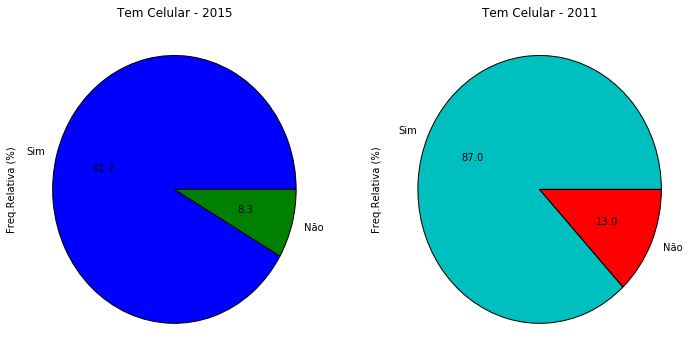

In [144]:
#2015 celular
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
cel15 = (p15.V0220.value_counts(True)*100).round(decimals=1).reindex(['Sim', 'Não'])
plot = cel15.plot(kind='pie',title='Tem Celular - 2015',autopct='%.1f',)
plt.ylabel('Freq.Relativa (%)')

#2011 celular
plt.subplot(122)
cel11 = (p11.V0220.value_counts(True)*100).round(decimals=1).reindex(['Sim', 'Não'])
plot = cel11.plot(kind='pie',title='Tem Celular - 2011',autopct='%.1f',colors=('c','r'))
plt.ylabel('Freq.Relativa (%)')

Em apenas 4 anos, cerca de 5% da população que não detinha um celular passou a possuir.

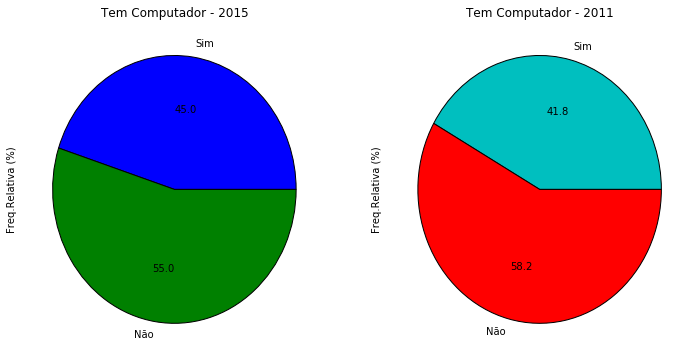

In [146]:
#2015
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
pc15 = (p15.V0231.value_counts(True)*100).round(decimals=1).reindex(['Sim', 'Não'])
plot = pc15.plot(kind='pie',title='Tem Computador - 2015',autopct='%.1f',)
plt.ylabel('Freq.Relativa (%)')

#2011
plt.subplot(122)
pc11 = (p11.V0231.value_counts(True)*100).round(decimals=1).reindex(['Sim', 'Não'])
plot = pc11.plot(kind='pie',title='Tem Computador - 2011',autopct='%.1f',colors=('c','r'))
plt.ylabel('Freq.Relativa (%)')

Em relação à possessão ou não de computadores, o número aumentou menos quando comparado aos dados de possessão de celular ao longo do mesmo período (cerca de 3,2%), mostrando que celulares se tornaram mais desejados que computadores. Além disso, mais de 90% da população declarou que possuia celular em 2015, enquanto, para os usuários de computador, o número permaneceu inferior a 50% nos dois anos analisados.

In [79]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=3)

In [83]:
#Tipo de domicílio x região - 2015
print('Frequencia relativa de Tipo de Domicílio por Região - 2015')
TDR15=pd.crosstab(df1.Regiao,p15.V0201,margins=True,rownames=['Região'], colnames=['Domicílio']).apply(percConvert, axis=1)
TDR15

Frequencia relativa de Tipo de Domicílio por Região - 2015


Domicílio,Particular Permanente,Particular improvisado,Coletivo,All
Região,,,,
Norte,99.685,0.267,0.048,100.0
Nordeste,99.850,0.135,0.015,100.0
Sudeste,99.755,0.173,0.072,100.0
Sul,99.662,0.194,0.143,100.0
Centro_Oeste,99.357,0.389,0.254,100.0
All,99.713,0.203,0.084,100.0


In [93]:
#Tipo de domicílio x região - 2011
print('Frequencia relativa de Tipo de Domicílio por Região - 2011')
TDR11=pd.crosstab(df1.Regiao,p11.V0201,margins=True,rownames=['Região'], colnames=['Domicílio']).apply(percConvert, axis=1)
TDR11

Frequencia relativa de Tipo de Domicílio por Região - 2011


Domicílio,Particular Permanente,Particular improvisado,Coletivo,All
Região,,,,
Norte,99.343,0.571,0.086,100.0
Nordeste,99.660,0.304,0.037,100.0
Sudeste,99.802,0.115,0.083,100.0
Sul,99.784,0.108,0.108,100.0
Centro_Oeste,99.459,0.472,0.069,100.0
All,99.664,0.263,0.073,100.0


No Norte e no Nordeste do país, a frequência relativa dos domicílios particulares permanentes aumentou quando comparamos 2011 com 2015. Já nas outras regiões, a frequência foi menor em 2015. Contudo, a frequência somada de todas as regiões foi maior em 2015.

In [94]:
#2015 - Pessoas por Domicilio
print('Frequencia relativa de Tipo de Pessoas por domicílio por domicílio - 2015')
PPD15=pd.crosstab(p15.V0201,df2.Pessoas_por_Domicilio,margins=True,rownames=['Domicílio'], colnames=['Pessoas por domicílio']).apply(percConvert, axis=1)
PPD15

Frequencia relativa de Tipo de Pessoas por domicílio por domicílio - 2015


Pessoas por domicílio,1~5,6~10,11~15,16~20,21~30,All
Domicílio,,,,,,
Particular Permanente,94.297,5.591,0.105,0.001,0.007,100.0
Particular improvisado,94.142,5.858,0.000,0.000,0.000,100.0
Coletivo,96.970,3.030,0.000,0.000,0.000,100.0
All,94.299,5.589,0.104,0.001,0.007,100.0


In [92]:
#2011 - Pessoas por Domicilio
print('Frequencia relativa de Tipo de Pessoas por domicílio por domicílio - 2011')
PPD11=pd.crosstab(p11.V0201,df2a.Pessoas_por_Domicilio_11,margins=True,rownames=['Domicílio'], colnames=['Pessoas por domicílio']).apply(percConvert, axis=1)
PPD11

Frequencia relativa de Tipo de Pessoas por domicílio por domicílio - 2011


Pessoas por domicílio,1~5,6~10,11~15,16~20,21~30,All
Domicílio,,,,,,
Particular Permanente,92.681,7.156,0.156,0.006,0.001,100.0
Particular improvisado,93.197,6.803,0.000,0.000,0.000,100.0
Coletivo,96.341,3.659,0.000,0.000,0.000,100.0
All,92.685,7.153,0.155,0.006,0.001,100.0


Em geral, o perfil dos domicílios permaneceu o mesmo, contudo, é importante destacar a diminuição no número de habitantes de domicilios particulares permanentes quando comparamos 2011 a 2015. Um dos possíveis motivos para tal diminuição foi a prosperidade econômica que o Brasil viveu a partir do ano de 2011, que culminou em 2013, encorajando muitos a deixarem de viver com seus pais e familiares e comprarem suas proprias casas.

In [96]:
#2015 - Pessoas por Domicilio por Região
print('Frequencia relativa de Tipo de Pessoas por domicílio por Região - 2011')
PPDR15=pd.crosstab(df1.Regiao, df2.Pessoas_por_Domicilio,margins=True,rownames=['Região'], colnames=['Pessoas por domicílio']).apply(percConvert, axis=1)
PPDR15

Frequencia relativa de Tipo de Pessoas por domicílio por Região - 2011


Pessoas por domicílio,1~5,6~10,11~15,16~20,21~30,All
Região,,,,,,
Norte,89.321,10.334,0.309,0.000,0.036,100.0
Nordeste,93.115,6.750,0.129,0.003,0.003,100.0
Sudeste,95.907,4.038,0.052,0.000,0.003,100.0
Sul,96.773,3.197,0.031,0.000,0.000,100.0
Centro_Oeste,95.540,4.429,0.032,0.000,0.000,100.0
All,94.299,5.589,0.104,0.001,0.007,100.0


In [97]:
#2011 - Pessoas por Domicilio
print('Frequencia relativa de Tipo de Pessoas por domicílio por Região - 2011')
PPDR11=pd.crosstab(df1.Regiao, df2a.Pessoas_por_Domicilio_11,margins=True,rownames=['Região'], colnames=['Pessoas por domicílio']).apply(percConvert, axis=1)
PPDR11

Frequencia relativa de Tipo de Pessoas por domicílio por Região - 2011


Pessoas por domicílio,1~5,6~10,11~15,16~20,21~30,All
Região,,,,,,
Norte,86.289,13.226,0.454,0.031,0.000,100.0
Nordeste,91.401,8.400,0.193,0.003,0.003,100.0
Sudeste,94.781,5.153,0.063,0.003,0.000,100.0
Sul,95.525,4.419,0.057,0.000,0.000,100.0
Centro_Oeste,94.708,5.246,0.046,0.000,0.000,100.0
All,92.685,7.153,0.155,0.006,0.001,100.0


Em todas as regiões, a quantidade de pessoas por domicílio tornou-se menor, em média, quando comparamos os anos de 2011 a 2015.

# Fazer análises

                  SM
count  115624.000000
mean        1.583560
std         2.388568
min         0.000000
25%         0.527919
50%         1.000000
75%         1.691624
max        90.946701


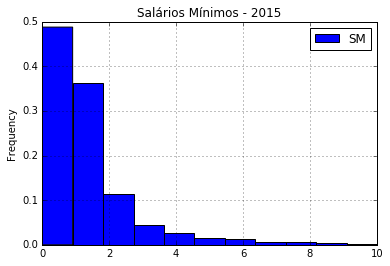

In [236]:
#2015
print(df3.describe())
SM15B = df3
SM15B.plot(kind='hist', title= "Salários Mínimos - 2015", grid=True, bins = 100, xlim=[0,10], normed=1)

               SM_11
count  106449.000000
mean        1.652384
std         2.832359
min         0.000000
25%         0.515596
50%         1.000000
75%         1.743119
max       229.357798


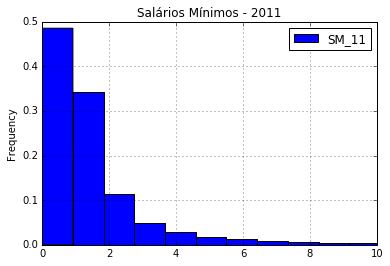

In [237]:
#2011
print(df3a.describe())
SM11B = df3a
SM11B.plot(kind='hist', title= "Salários Mínimos - 2011", grid=True, bins = 250, xlim=[0,10], normed=1)

Fazer análise.

       Comodos_por_domicílio
count          117601.000000
mean                5.773692
std                 1.999496
min                 1.000000
25%                 5.000000
50%                 5.000000
75%                 7.000000
max                28.000000


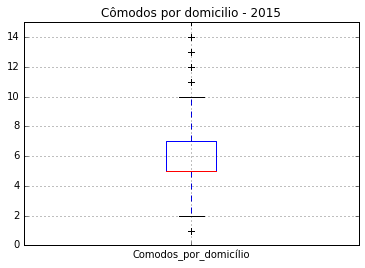

In [250]:
#2015
df5 = df5.dropna()
df5.plot(kind='box', title= "Cômodos por domicilio - 2015", grid=True, ylim=[0,15])
print(df5.describe())

       Comodos_por_domicílio_11
count             111610.000000
mean                   5.712678
std                    2.067074
min                    1.000000
25%                    5.000000
50%                    5.000000
75%                    7.000000
max                   28.000000


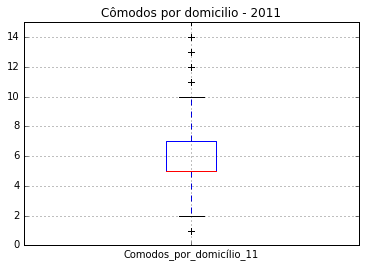

In [251]:
#2011
df5a = df5a.dropna()
df5a.plot(kind='box', title= "Cômodos por domicilio - 2011", grid=True, ylim=[0,15])
print(df5a.describe())

Fazer análise.

(0, 100)

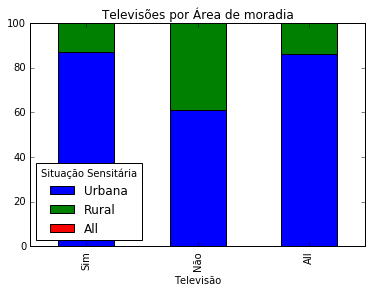

In [271]:
#
crosstrab=pd.crosstab(df4.Situação_Sensitária, p15.V0226,margins=True,rownames=['Situação Sensitária'], colnames=['Televisão']).apply(percConvert, axis=0)
plot = crosstrab.T.plot(kind='bar', stacked=True,title='Televisões por Área de moradia', legend=True)
plot.set_ylim([0, 100])

(0, 100)

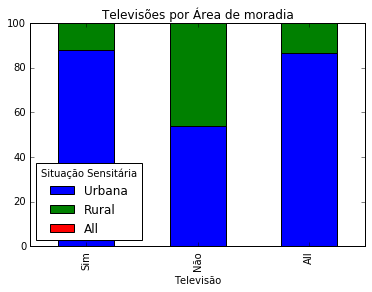

In [272]:
crosstrab1=pd.crosstab(df4a.Situação_Sensitária_11, p11.V0226,margins=True,rownames=['Situação Sensitária'], colnames=['Televisão']).apply(percConvert, axis=0)
plot = crosstrab1.T.plot(kind='bar', stacked=True,title='Televisões por Área de moradia', legend=True)
plot.set_ylim([0, 100])

Fazer análise.

# Conclusão

Fazer conclusão.